In [1]:
import pandas as pd
df=pd.read_csv(r"/content/blogs (2).csv")
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [2]:
df.shape

(2000, 2)

In [3]:
df.columns

Index(['Data', 'Labels'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [8]:
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [9]:
display(df.describe(include='all'))


,Data,Labels
count,2000,2000
unique,2000,20
top,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,alt.atheism
freq,1,100


In [12]:
import matplotlib.pyplot as plt
class_counts = df["Labels"].value_counts().sort_values(ascending=False)
display(class_counts.to_frame("count"))

,count
Labels,
alt.atheism,100
comp.graphics,100
comp.os.ms-windows.misc,100
comp.sys.ibm.pc.hardware,100
comp.sys.mac.hardware,100
comp.windows.x,100
misc.forsale,100
rec.autos,100
rec.motorcycles,100


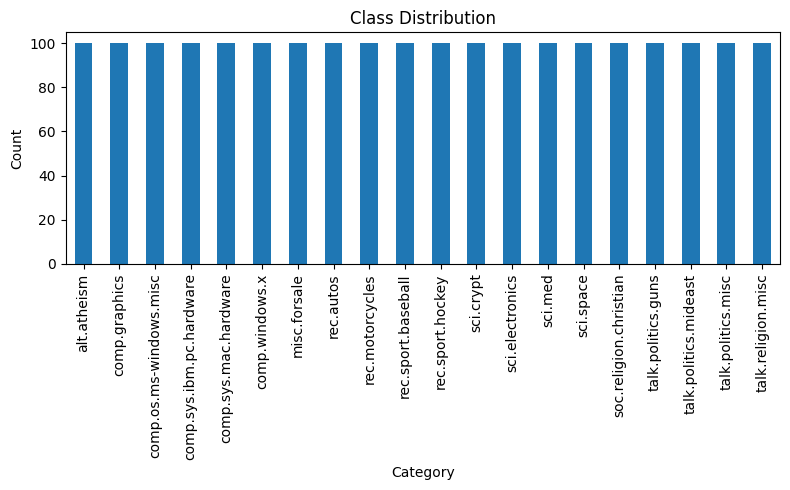

In [13]:
plt.figure(figsize=(8, 5))
class_counts.plot(kind="bar")
plt.title("Class Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [16]:
df["text_len"] = df["Data"].fillna("").astype(str).apply(lambda s: len(s.split()))
df["char_len"] = df["Data"].fillna("").astype(str).apply(len)
display(df[["text_len", "char_len"]].describe())

,text_len,char_len
count,2000.000000,2000.000000
mean,314.166000,2324.978000
std,539.210333,3590.560226
min,31.000000,425.000000
25%,127.000000,1147.000000
50%,194.000000,1605.500000
75%,319.000000,2374.500000
max,10384.000000,62290.000000


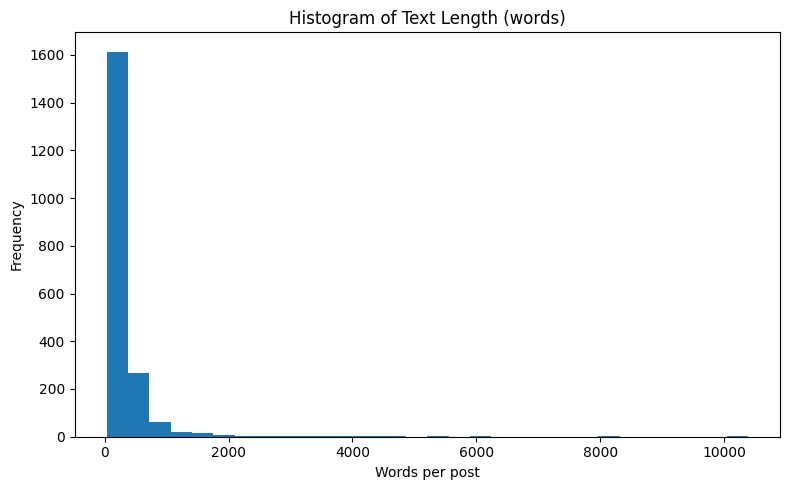

In [15]:
plt.figure(figsize=(8, 5))
plt.hist(df["text_len"], bins=30)
plt.title("Histogram of Text Length (words)")
plt.xlabel("Words per post")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [18]:
import re
import string
PUNCT_TABLE = str.maketrans("", "", string.punctuation)
def clean_text(s: str) -> str:
    if not isinstance(s, str):
        s = str(s)
    s = s.lower()
    s = s.translate(PUNCT_TABLE)
    s = re.sub(r"\d+", " ", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s
df["clean"] = df["Data"].astype(str).apply(clean_text)
df[["Data", "clean"]].head()

,Data,clean
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,newsgroups altatheism path cantaloupesrvcscmue...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,xref cantaloupesrvcscmuedu altatheism talkreli...


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df["clean"], df["Labels"], test_size=0.2, random_state=42, stratify=df["Labels"])

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
pipe = Pipeline([("tfidf", TfidfVectorizer(ngram_range=(1,2), min_df=2)),("nb", MultinomialNB())])
pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(min_df=2, ngram_range=(1, 2))),
                ('nb', MultinomialNB())])

In [21]:
y_pred = pipe.predict(X_test)

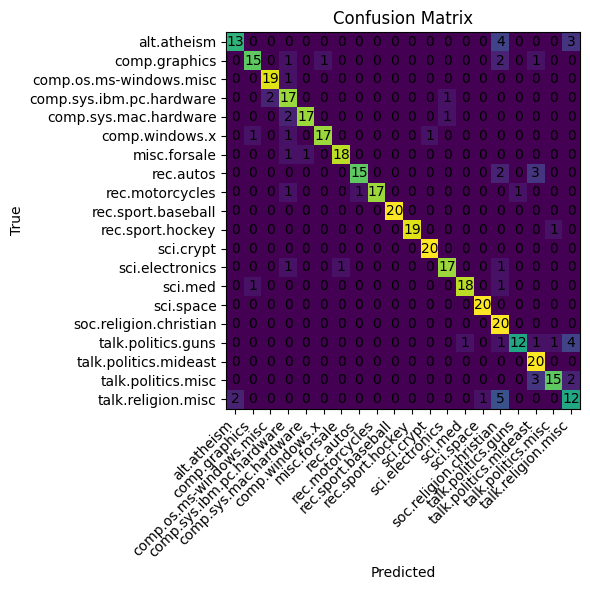

In [22]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
labels_order = sorted(df["Labels"].unique())
cm = confusion_matrix(y_test, y_pred, labels=labels_order)
plt.figure(figsize=(6, 6))
plt.imshow(cm, aspect='auto')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(range(len(labels_order)), labels_order, rotation=45, ha='right')
plt.yticks(range(len(labels_order)), labels_order)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.tight_layout()
plt.show()

,count
sentiment,
positive,896
neutral,818
negative,286


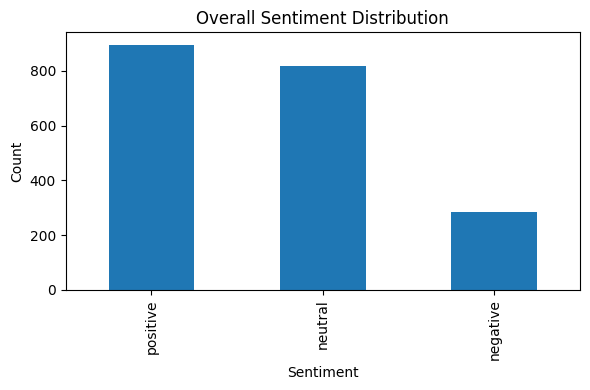

In [28]:
sent_counts = df["sentiment"].value_counts().reindex(["positive","neutral","negative"]).fillna(0)
display(sent_counts.to_frame("count"))
plt.figure(figsize=(6,4))
sent_counts.plot(kind="bar")
plt.title("Overall Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [32]:
import numpy as np
grouped = df.groupby(["Labels", "sentiment"]).size().unstack(fill_value=0)
display(grouped)
plt.figure(figsize=(10,6))
x = np.arange(len(grouped.index))
bar_width = 0.25

sentiment,negative,neutral,positive
Labels,,,
alt.atheism,17,46,37
comp.graphics,14,39,47
comp.os.ms-windows.misc,22,44,34
comp.sys.ibm.pc.hardware,23,40,37
comp.sys.mac.hardware,18,52,30
comp.windows.x,19,47,34
misc.forsale,3,43,54
rec.autos,9,34,57
rec.motorcycles,10,29,61


<Figure size 1000x600 with 0 Axes>

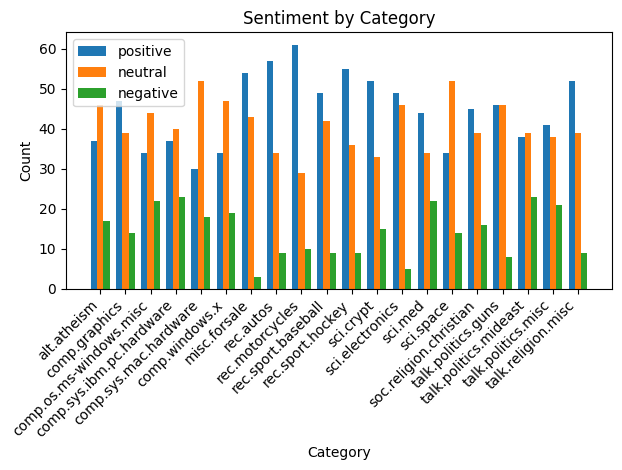

In [35]:
pos_vals = grouped.get("positive", pd.Series([0]*len(grouped), index=grouped.index)).values
neu_vals = grouped.get("neutral", pd.Series([0]*len(grouped), index=grouped.index)).values
neg_vals = grouped.get("negative", pd.Series([0]*len(grouped), index=grouped.index)).values
plt.bar(x - bar_width, pos_vals, width=bar_width, label="positive")
plt.bar(x, neu_vals, width=bar_width, label="neutral")
plt.bar(x + bar_width, neg_vals, width=bar_width, label="negative")
plt.title("Sentiment by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(x, grouped.index, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()